In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

city_df = pd.read_csv('data/city_data.csv')
ride_df = pd.read_csv('data/ride_data.csv')

In [2]:
full_df = pd.merge(ride_df, city_df, on='city')

In [3]:
full_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [4]:
# Obtain the x and y coordinates for each of the three city types
x_data = full_df.groupby(['city'])['ride_id'].count()
y_data = full_df.groupby(['city'])['fare'].mean()
z_data = city_df.groupby(['city'])['driver_count'].sum()
city_type = full_df[['city', 'type']].copy()
city_type = city_type.drop_duplicates(subset=None, keep='first', inplace=False)

scatter_df = pd.merge(x_data.to_frame(), y_data.to_frame(), on='city')
scatter_df = pd.merge(scatter_df, z_data.to_frame(), on='city')
scatter_df = pd.merge(scatter_df, city_type, on='city', how='left')

scatter_df.head()

,city,ride_id,fare,driver_count,type
0,Amandaburgh,18,24.641667,12,Urban
1,Barajasview,22,25.332273,26,Urban
2,Barronchester,16,36.422500,11,Suburban
3,Bethanyland,18,32.956111,22,Suburban
4,Bradshawfurt,10,40.064000,7,Rural


Text(0.92,0.5,'Circle size correlates with driver count per city.')

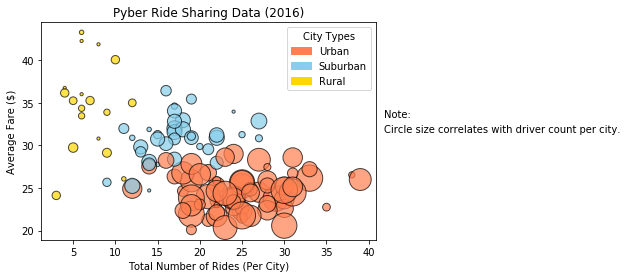

In [104]:
type_mapping = {'Urban':'coral', 'Suburban':'skyblue', 'Rural':'gold'}
plt.scatter(scatter_df['ride_id'], scatter_df['fare'], s=scatter_df['driver_count']*10, c=scatter_df['type'].map(type_mapping), 
            alpha=0.7, linewidth=1, edgecolors='black')

plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')

urban_patch = mpatches.Patch(color='coral', label='Urban')
suburban_patch = mpatches.Patch(color='skyblue', label='Suburban')
rural_patch = mpatches.Patch(color='gold', label='Rural')

plt.legend(handles=[urban_patch, suburban_patch, rural_patch], title='City Types')

textstr1 = 'Note: '
textstr2 = 'Circle size correlates with driver count per city.'
plt.text(0.92, 0.55, textstr1, fontsize=10, transform=plt.gcf().transFigure)
plt.text(0.92, 0.5, textstr2, fontsize=10, transform=plt.gcf().transFigure)

## Total Fares by City Type

Text(0,0.5,'')

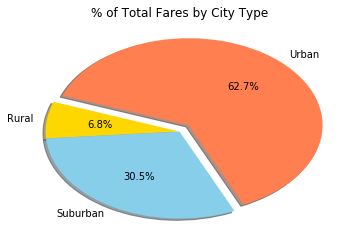

In [8]:
pie_pct = full_df.groupby(['type'])['fare'].sum() / full_df['fare'].sum()

explode = [0, 0, 0.1]
colors = ['gold', 'skyblue', 'coral']
ax1 = pie_pct.plot(kind='pie', title='% of Total Fares by City Type', explode=explode, autopct='%1.1f%%', 
                   startangle=160, shadow=True, colors=colors)
ax1.set_ylabel('')


## Total Rides by City Type

Text(0,0.5,'')

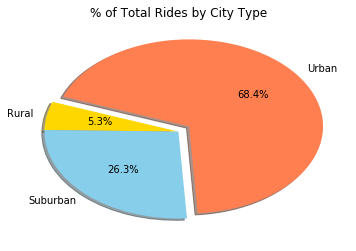

In [9]:
ride_pct = full_df.groupby(['type'])['ride_id'].count() / full_df['ride_id'].count()

explode = [0, 0, 0.1]
colors = ['gold', 'skyblue', 'coral']
ax1 = ride_pct.plot(kind='pie', title='% of Total Rides by City Type', explode=explode, autopct='%1.1f%%', 
                    startangle=160, shadow=True, colors=colors)
ax1.set_ylabel('')

## Total Drivers by City Type

Text(0,0.5,'')

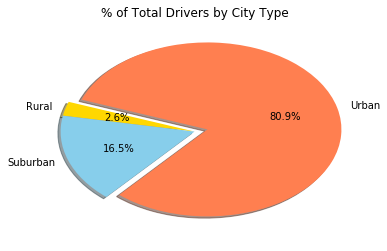

In [10]:
driver_pct = scatter_df.groupby(['type'])['driver_count'].sum() / scatter_df['driver_count'].sum()

explode = [0, 0, 0.1]
colors = ['gold', 'skyblue', 'coral']
ax1 = driver_pct.plot(kind='pie', title='% of Total Drivers by City Type', explode=explode, autopct='%1.1f%%', 
                    startangle=160, shadow=True, colors=colors)
ax1.set_ylabel('')
